### Independent variables

1.buying : buying price

2.maint : maintenance price

3.doors : number of doors

4.persons : capacity in terms of persons to carry

5.lug_boot : the size of luggage boot

6.safety: estimated safety of the car

In [1]:
# Load EDA Packages
import numpy as np
import pandas as pd
import xgboost as xgb

In [2]:
# Load Visulazation Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
car = pd.read_csv('car_evaluation.csv')

In [6]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
car.shape

(1728, 7)

In [8]:
car.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,more,med,low,unacc
freq,432,432,432,576,576,576,1210


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
for i in car.columns:
    print(car[i].unique(),"\t",car[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [12]:
class_label = ("'acc: 1', 'vgood: 3', 'unacc: 2', 'good: 0'")
class_label

"'acc: 1', 'vgood: 3', 'unacc: 2', 'good: 0'"

In [13]:
# Check for Value Counts
car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

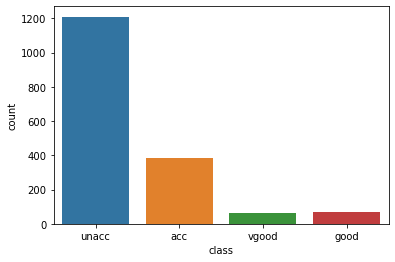

In [14]:
sns.countplot(car['class'])

### Using LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
for i in car.columns:
    car[i]=le.fit_transform(car[i])

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int32
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


In [18]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


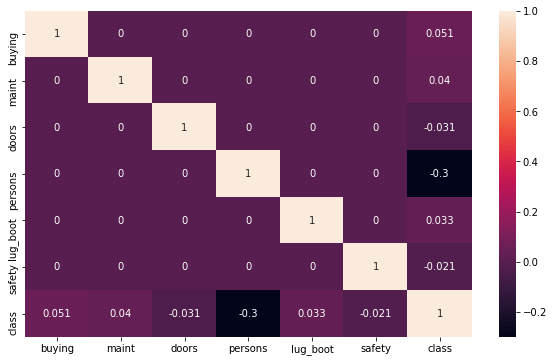

In [19]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(car.corr(),annot=True)

In [20]:
X=car[car.columns[:-1]]
Y=car['class']

In [21]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [23]:
# Using Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
predict_logreg=logreg.predict(X_test)

In [24]:
predict_logreg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [25]:
logreg.score(X_test,Y_test)

0.6589595375722543

### 2. KNN Classifier

In [26]:
# Using KNN Classifier
knn=KNeighborsClassifier(n_jobs=-1) 

In [27]:
knn.fit(X_train,Y_train)
predict_knn=knn.predict(X_test)
predict_knn

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0,
       1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [28]:
knn.score(X_test,Y_test)

0.8930635838150289

### 3.Random Forests Classifier

In [29]:
# Using Random Forests Classifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)
rfc.fit(X_train,Y_train) 
predict_rfc=knn.predict(X_test)

In [30]:
predict_rfc

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0,
       1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [31]:
print(rfc.score(X_test,Y_test))  

0.9653179190751445


### 4.XGBoost

In [32]:
# Using XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,Y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
predict_xgb = xgb_classifier.predict(X_test)
predict_xgb

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [35]:
print("Accuracy of Model::",accuracy_score(Y_test,predict_xgb))

Accuracy of Model:: 0.9797687861271677


XGBoost is providing 98% accuracy

## Precision & Recall

In [36]:
from sklearn import metrics

#print the confusion matrix
print(metrics.confusion_matrix(Y_test, predict_logreg))

#print precision and recall
print(metrics.classification_report(Y_test, predict_logreg))

[[ 11   0  69   3]
 [  2   0   9   0]
 [ 17   0 217   1]
 [ 12   0   5   0]]
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



In [37]:
#print the confusion matrix
print(metrics.confusion_matrix(Y_test, predict_knn))

#print precision and recall
print(metrics.classification_report(Y_test, predict_knn))

[[ 62   2  18   1]
 [  5   6   0   0]
 [  0   0 235   0]
 [  5   2   4   6]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        83
           1       0.60      0.55      0.57        11
           2       0.91      1.00      0.96       235
           3       0.86      0.35      0.50        17

    accuracy                           0.89       346
   macro avg       0.81      0.66      0.71       346
weighted avg       0.89      0.89      0.88       346



In [38]:
#print the confusion matrix
print(metrics.confusion_matrix(Y_test, predict_rfc))

#print precision and recall
print(metrics.classification_report(Y_test, predict_rfc))

[[ 62   2  18   1]
 [  5   6   0   0]
 [  0   0 235   0]
 [  5   2   4   6]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        83
           1       0.60      0.55      0.57        11
           2       0.91      1.00      0.96       235
           3       0.86      0.35      0.50        17

    accuracy                           0.89       346
   macro avg       0.81      0.66      0.71       346
weighted avg       0.89      0.89      0.88       346



In [39]:
#print the confusion matrix
print(metrics.confusion_matrix(Y_test, predict_xgb))

#print precision and recall
print(metrics.classification_report(Y_test, predict_xgb))

[[ 79   4   0   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        83
           1       0.65      1.00      0.79        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.98       346
   macro avg       0.91      0.94      0.91       346
weighted avg       0.99      0.98      0.98       346



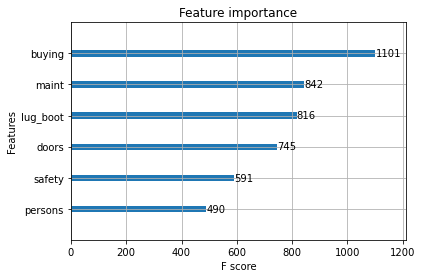

In [40]:
# Feature Importance
xgb.plot_importance(xgb_classifier)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### K-FOLD CROSS VALIDATION 

In [41]:
print (cross_val_score(logreg,X,Y,cv=10, scoring = 'accuracy'))

[0.69364162 0.58959538 0.66473988 0.6300578  0.64739884 0.6300578
 0.69942197 0.66473988 0.6744186  0.68023256]


In [42]:
print (cross_val_score(knn,X,Y,cv=10, scoring = 'accuracy'))

[0.61271676 0.68786127 0.69364162 0.68786127 0.75722543 0.69942197
 0.80346821 0.79768786 0.8372093  0.84883721]


In [43]:
print (cross_val_score(rfc,X,Y,cv=10, scoring = 'accuracy'))

[0.72254335 0.75144509 0.88439306 0.76878613 0.89595376 0.9017341
 0.84393064 0.89017341 0.96511628 0.9127907 ]


In [44]:
print (cross_val_score(classifier,X,Y,cv=10, scoring = 'accuracy'))

[0.76878613 0.77456647 0.91907514 0.78034682 0.94219653 0.91907514
 0.91907514 0.93641618 1.         0.89534884]
